In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sys
sys.path.append("creation_functions")
from creation_functions.utilities import get_some_filter

In [7]:
raw_dataset = pd.read_csv("raw_dataset.csv")

[Text(0.5, 0, 'Frequency (Hz)'), Text(0, 0.5, 'Amplitude')]

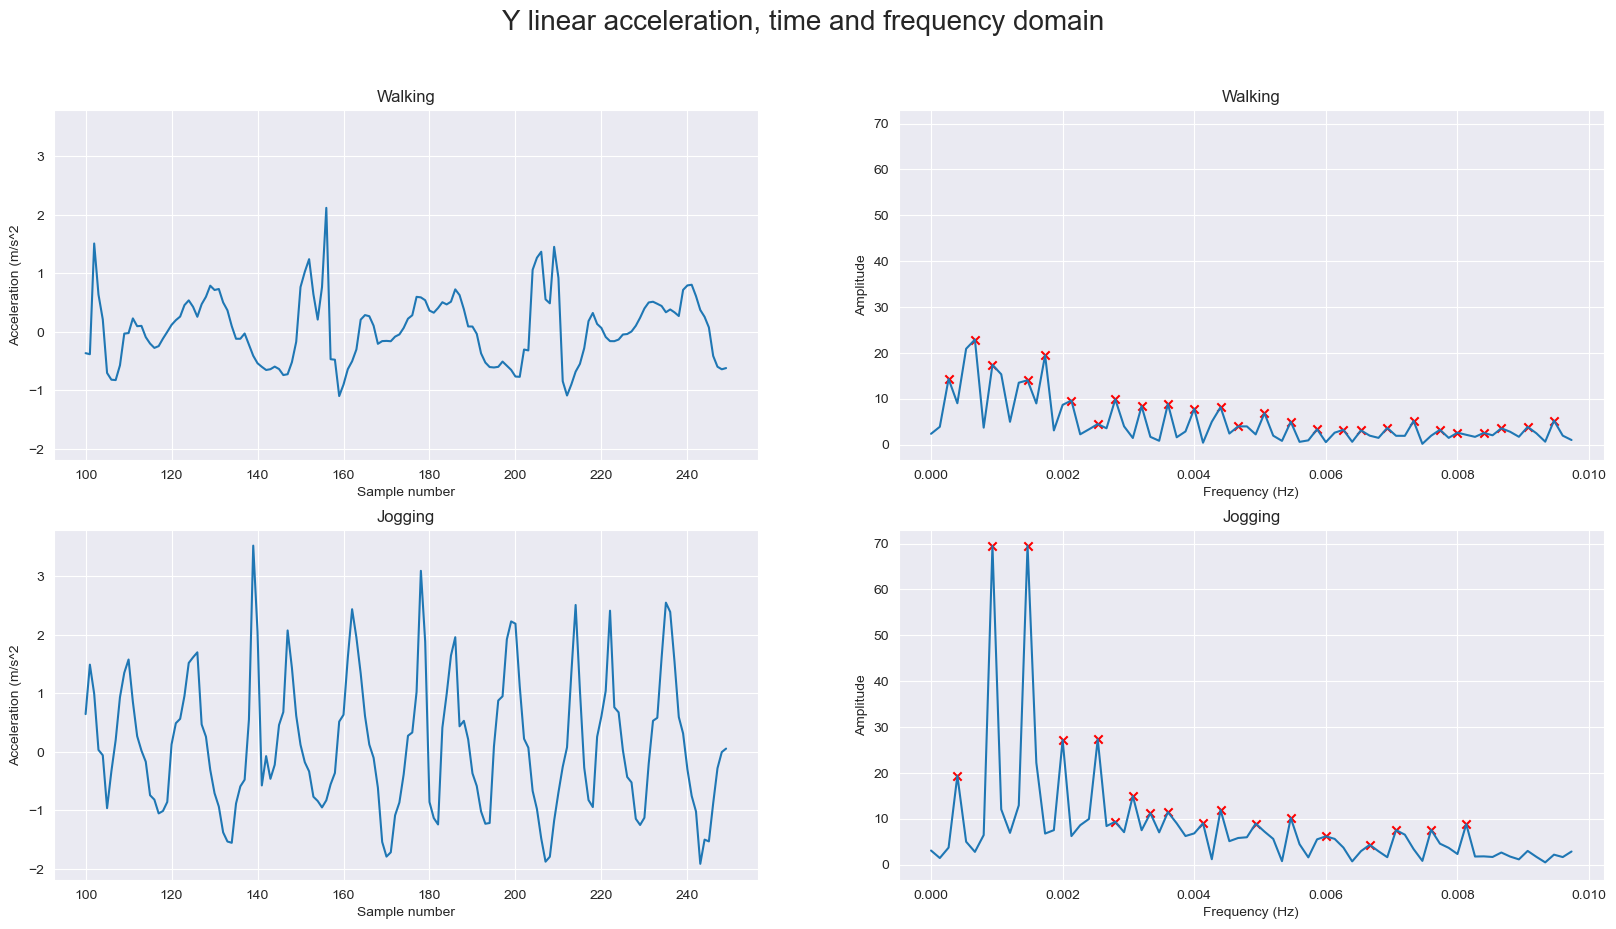

In [2]:
import detecta
from numpy.fft import fft

f,axes=plt.subplots(2,2,figsize=(20,10), sharey="col")

walking_df=pd.read_csv("A_DeviceMotion_data/wlk_7/sub_1.csv")["userAcceleration.y"][100:250]
jogging_df=pd.read_csv("A_DeviceMotion_data/jog_9/sub_1.csv")["userAcceleration.y"][100:250]

f.suptitle("Y linear acceleration, time and frequency domain", fontsize=20)

## TIME DOMAIN ##

axes[0][0].plot(walking_df)
axes[0][0].title.set_text("Walking")
axes[0][0].set(xlabel="Sample number", ylabel="Acceleration (m/s^2")
axes[1][0].plot(jogging_df)
axes[1][0].title.set_text("Jogging")
axes[1][0].set(xlabel="Sample number", ylabel="Acceleration (m/s^2")

## FREQUENCY DOMAIN ##
N=150
n=np.arange(-1,N)
sr=1/50
T=N/sr
freq=n/T
c=20

# FFT computing
n_oneside=N//2
x=freq[1:n_oneside]
y_wlk=np.abs(fft(walking_df)[1:n_oneside])
y_jog=np.abs(fft(jogging_df)[1:n_oneside])

# PEAKS computing
p_x_wlk=detecta.detect_peaks(y_wlk, mph=np.amax(y_wlk)/c)
p_x_jog=detecta.detect_peaks(y_jog, mph=np.amax(y_jog)/c)

#PLOT
axes[0][1].plot(x,y_wlk)
axes[0][1].scatter(p_x_wlk/T, y_wlk[p_x_wlk], marker="x", c="red")
axes[0][1].title.set_text("Walking")
axes[0][1].set(xlabel="Frequency (Hz)", ylabel="Amplitude")
axes[1][1].plot(x,y_jog)
axes[1][1].scatter(p_x_jog/T, y_jog[p_x_jog], marker="x", c="red")
axes[1][1].title.set_text("Jogging")
axes[1][1].set(xlabel="Frequency (Hz)", ylabel="Amplitude")

[Text(0.5, 1.0, 'c=100')]

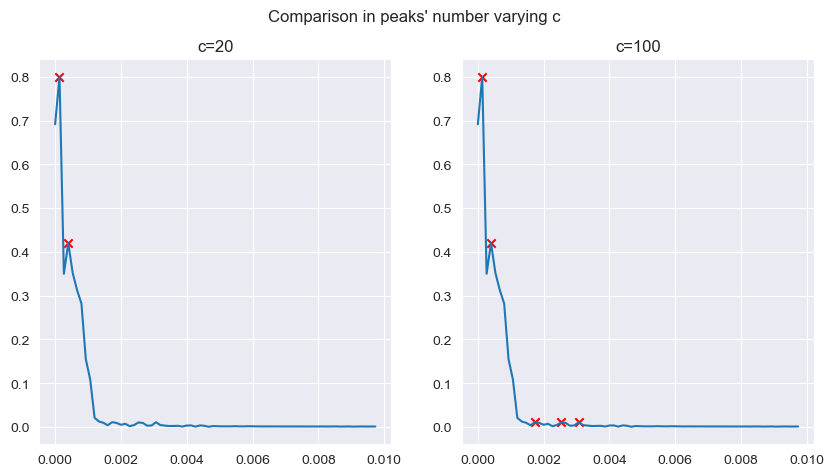

In [3]:
from creation_functions.feature_extraction import noise_filter
df_without_visible_peaks = noise_filter(pd.read_csv("A_DeviceMotion_data/std_6/sub_24.csv"))["gravity.y"][3600:3750]

## FREQUENCY DOMAIN ##
N=150
n=np.arange(-1,N)
sr=1/50
T=N/sr
freq=n/T
c=20

# FFT computing
n_oneside=N//2
x=freq[1:n_oneside]
y_sit=np.abs(fft(df_without_visible_peaks)[1:n_oneside])

f,axes=plt.subplots(1,2,figsize=(10,5))
f.suptitle("Comparison in peaks' number varying c")

# PEAKS computing
p_x_sit_20=detecta.detect_peaks(y_sit, mph=np.amax(y_sit)/c)
c+=70
p_x_sit_30=detecta.detect_peaks(y_sit, mph=np.amax(y_sit)/c)

axes[0].plot(x,y_sit)
axes[0].scatter(p_x_sit_20/T, y_sit[p_x_sit_20], marker="x", c="red")
axes[0].set(title="c=20")

axes[1].plot(x,y_sit)
axes[1].scatter(p_x_sit_30/T, y_sit[p_x_sit_30], marker="x", c="red")
axes[1].set(title="c=100")

In [ ]:
# Scrivere a parole un caso in cui c non risolve

In [8]:
from scipy.signal import savgol_filter


# Here we have a template for the real function we are putting in .py file
def noise_filter(data, k=10, pol=2):
    dataframe = data.copy()
    for column in dataframe.columns:
        dataframe[column] = savgol_filter(dataframe[column], k, pol, axis=0)
    return dataframe


little_test = get_some_filter(raw_dataset, [5], ["jog"])
little_test = little_test.loc[little_test["trial"] == 9][100:250]
little_test.drop(["subject", "trial", "class"], axis=1, inplace=True)

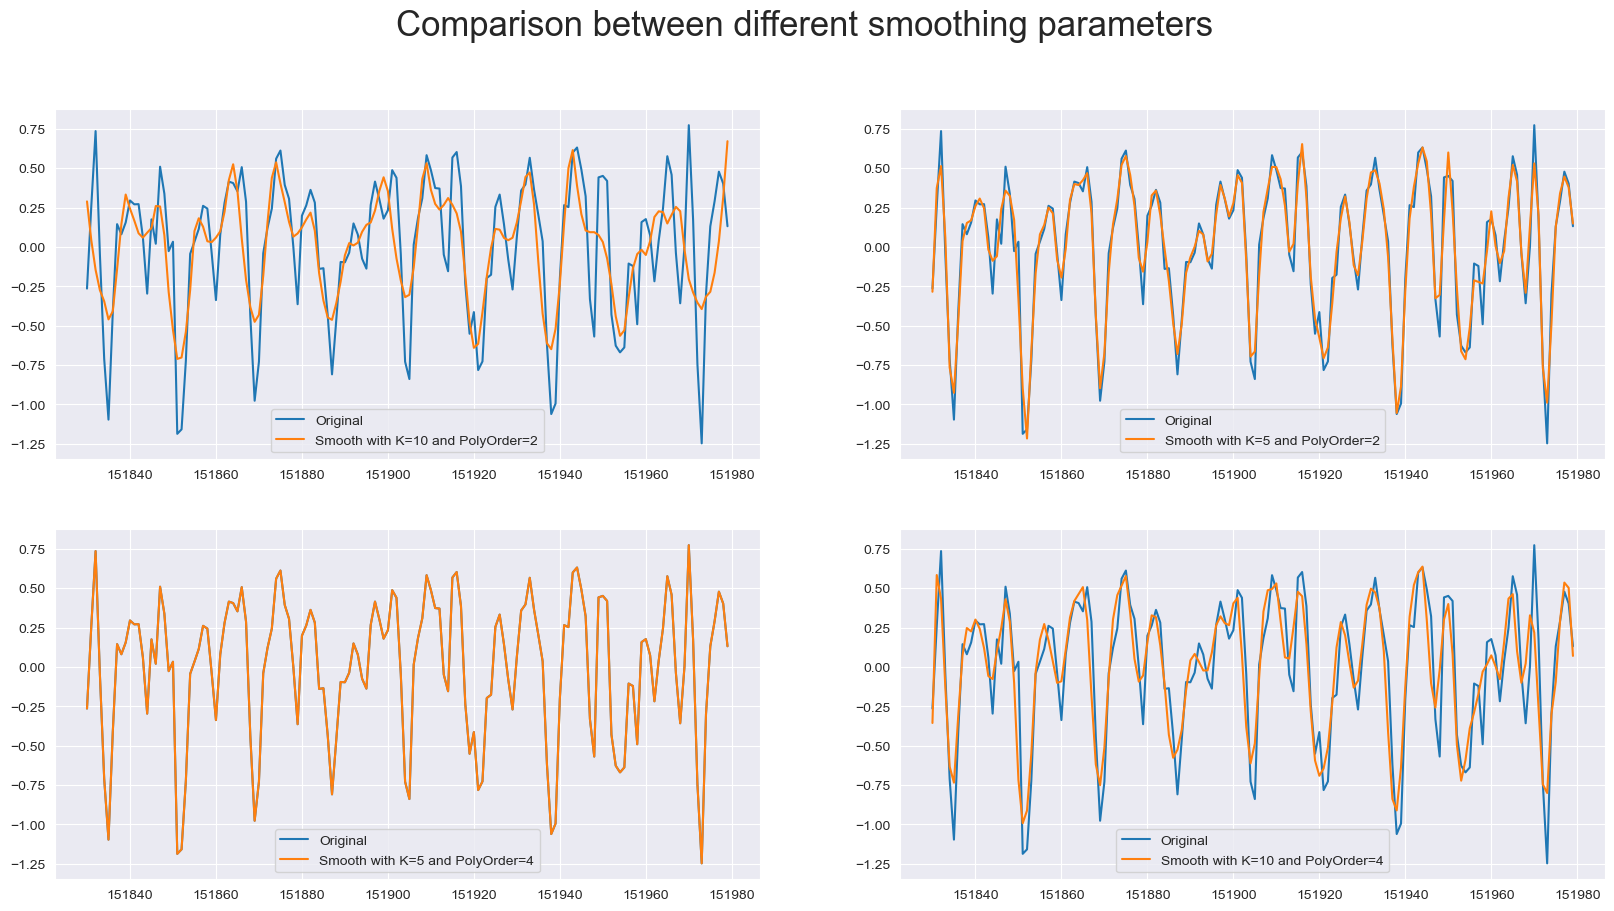

In [9]:
f, axes=plt.subplots(2,2,figsize=(20,10))
f.suptitle("Comparison between different smoothing parameters", fontsize=25)

axes[0][0].plot(little_test["userAcceleration.x"])
axes[0][0].plot(noise_filter(little_test)["userAcceleration.x"])
axes[0][0].legend(["Original", "Smooth with K=10 and PolyOrder=2"])

axes[0][1].plot(little_test["userAcceleration.x"])
axes[0][1].plot(noise_filter(little_test, k=5, pol=2)["userAcceleration.x"])
axes[0][1].legend(["Original", "Smooth with K=5 and PolyOrder=2"])

axes[1][0].plot(little_test["userAcceleration.x"])
axes[1][0].plot(noise_filter(little_test, k=5, pol=4)["userAcceleration.x"])
axes[1][0].legend(["Original", "Smooth with K=5 and PolyOrder=4"])

axes[1][1].plot(little_test["userAcceleration.x"])
axes[1][1].plot(noise_filter(little_test, k=10, pol=4)["userAcceleration.x"])
axes[1][1].legend(["Original", "Smooth with K=10 and PolyOrder=4"])